[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/witchapong/build-ai-based-applications/blob/main/tabular/2_eda.ipynb)

# Stock Price Prediction using ML model
In this session, we'll learn how to build a ML model for predicting **%change of stock prices of the next day** of stocks in SET index (Stock Exchange of Thailand). Thus, we should be able to use the prediction to buy stocks that are going up the next day, make profits, and hopefully get rich!

This session is divided into the following 5 notebooks.
1. `1_collect_data.ipynb`
2. `2_eda.ipynb` (current notebook)
3. `3_features_prep.ipynb`
4. `4_make_prediction.ipynb`
5. `5_evaluation.ipynb`

In [1]:
# # mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
from pathlib import Path

# running on Colab
DATA_DIR = Path("/content/drive/MyDrive/build-ai-based-applications/")

# # running on local
# DATA_DIR = Path(".")

# Exploratory Data Analysis (EDA)
In this notebook, we will explore the data we have collected from the previous step. The benefit for exploring the data before diving into building ML model is the following.
1. To verify if there is any problem or abnormality about the data that we should address before using the data to build a model
2. To extract any interesting insights from the data that we could probably use to build a model

The best way to explore the data is to look at key statistics and visualize the data.

In [3]:
import pandas as pd
pd.options.display.max_columns = 100
from glob import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Price
For data glossary, see https://www.setsmart.com/ssm/api-service/api-specification/EOD_Price_and_Statistics_by_Security_Type

What we will explore?
- Trend of SET index -> Are we in a Bull or Bear market?
- Number of symbols on each day -> Check for data completeness throughout the period of time
- Distribution of daily return -> How many daily percent return are we looking for in building a model?
- Risk & return of stocks -> How are risk vs return of stocks?
- Which stock is the best performer

In [4]:
price_df = pd.read_csv(DATA_DIR / "data/set_price.csv")

In [5]:
price_df.head()

,symbol,date,open,high,low,close,volume,dividends,stock splits,capital gains
0,24CS,2022-10-03,7.10,10.20,7.10,10.20,559465900,0.0,0.0,NaN
1,24CS,2022-10-04,10.70,11.10,7.15,7.15,330707400,0.0,0.0,NaN
2,24CS,2022-10-05,5.85,6.45,5.05,5.15,361028900,0.0,0.0,NaN
3,24CS,2022-10-06,5.40,5.45,4.70,5.20,232679200,0.0,0.0,NaN
4,24CS,2022-10-07,5.10,5.15,4.76,5.00,131778400,0.0,0.0,NaN


In [6]:
# lower column names
price_df.columns = price_df.columns.str.lower()

In [7]:
# rearrange columns order
price_df = price_df[["symbol"] + [col for col in price_df.columns if col != "symbol"]]

In [8]:
price_df["date"] = pd.to_datetime(price_df["date"]).dt.date

In [9]:
price_df.head()

,symbol,date,open,high,low,close,volume,dividends,stock splits,capital gains
0,24CS,2022-10-03,7.10,10.20,7.10,10.20,559465900,0.0,0.0,NaN
1,24CS,2022-10-04,10.70,11.10,7.15,7.15,330707400,0.0,0.0,NaN
2,24CS,2022-10-05,5.85,6.45,5.05,5.15,361028900,0.0,0.0,NaN
3,24CS,2022-10-06,5.40,5.45,4.70,5.20,232679200,0.0,0.0,NaN
4,24CS,2022-10-07,5.10,5.15,4.76,5.00,131778400,0.0,0.0,NaN


In [10]:
# check-point
price_df.to_csv(DATA_DIR / "data/set_price.csv", index=False)

## Trend of SET index

In [11]:
set_data = pd.read_csv(DATA_DIR / "data/set_price_index.csv")

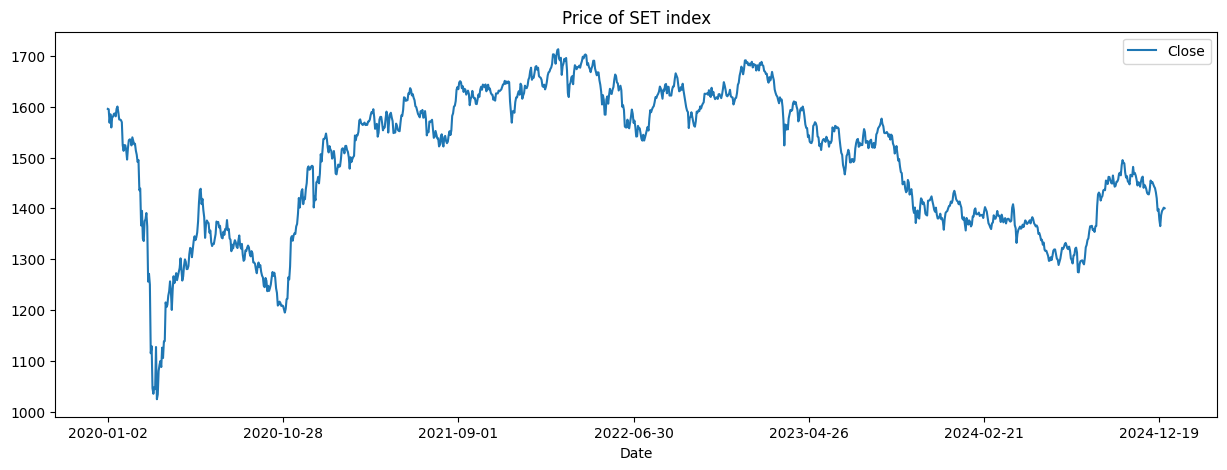

In [14]:
_ = set_data[["Date", "Close"]].plot(x="Date", y="Close", figsize=(15, 5))
_ = plt.title("Price of SET index")

## Number of symbols on each day

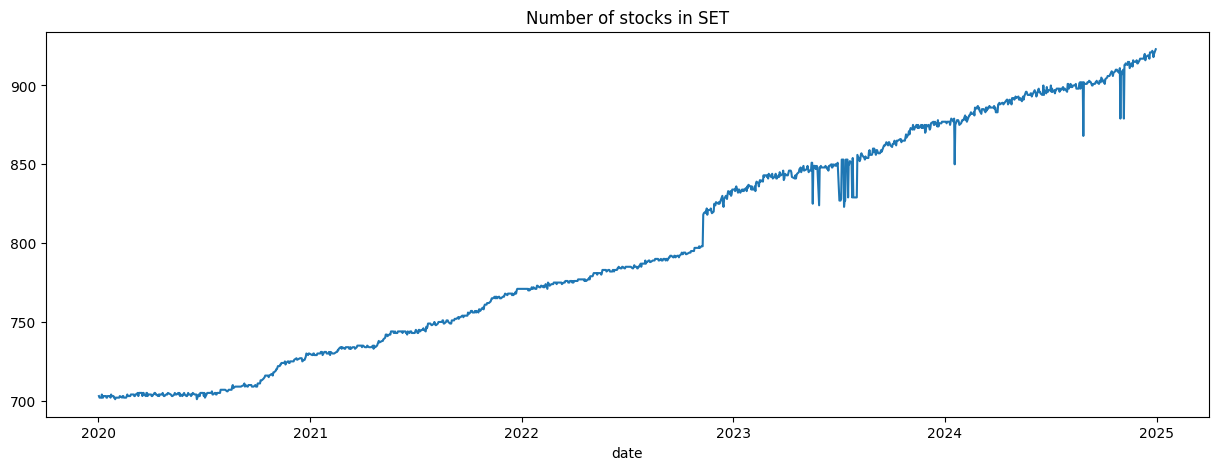

In [15]:
_ = price_df.groupby("date")["symbol"].nunique().plot(kind="line", figsize=(15, 5))
_ = plt.title("Number of stocks in SET")

## Distribution of daily return

In [16]:
# calculate daily return

# >> sort the data by symbol and date
price_df = price_df.sort_values(by=["symbol", "date"]).reset_index(drop=True)

# >> calculate daily return
price_df["r_01"] = price_df.groupby("symbol")["close"].pct_change()

<ipython-input-16-b1771461b68a>:7: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  price_df["r_01"] = price_df.groupby("symbol")["close"].pct_change()


In [17]:
price_df.head()

,symbol,date,open,high,low,close,volume,dividends,stock splits,capital gains,r_01
0,24CS,2022-10-03,7.10,10.20,7.10,10.20,559465900,0.0,0.0,NaN,NaN
1,24CS,2022-10-04,10.70,11.10,7.15,7.15,330707400,0.0,0.0,NaN,-0.299020
2,24CS,2022-10-05,5.85,6.45,5.05,5.15,361028900,0.0,0.0,NaN,-0.279720
3,24CS,2022-10-06,5.40,5.45,4.70,5.20,232679200,0.0,0.0,NaN,0.009709
4,24CS,2022-10-07,5.10,5.15,4.76,5.00,131778400,0.0,0.0,NaN,-0.038462


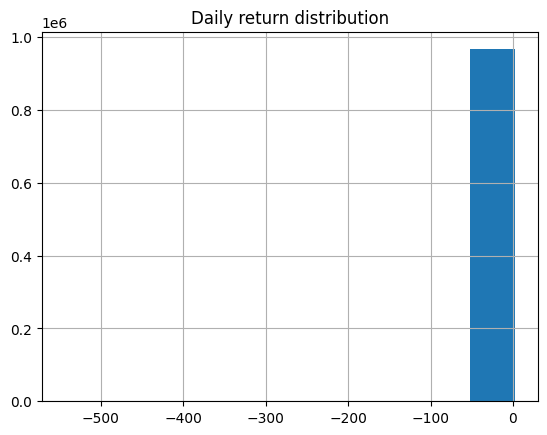

In [18]:
# let's plot the daily return distribution without filtering out the outliers
_ = price_df["r_01"].hist(bins=10)
_ = plt.title("Daily return distribution")

In [19]:
price_df[price_df["r_01"] == price_df["r_01"].min()]

,symbol,date,open,high,low,close,volume,dividends,stock splits,capital gains,r_01
756579,STHAI,2021-04-09,-0.01218,-0.01218,-0.01218,-0.01218,0,0.098,0.0,0.0,-544.444422


In [20]:
price_df.iloc[756579 - 5:  756579 + 5, :]

,symbol,date,open,high,low,close,volume,dividends,stock splits,capital gains,r_01
756574,STHAI,2021-04-01,0.000022,0.000022,0.000022,0.000022,0,0.000,0.0,0.0,0.000000
756575,STHAI,2021-04-02,0.000022,0.000022,0.000022,0.000022,0,0.000,0.0,0.0,0.000000
756576,STHAI,2021-04-05,0.000022,0.000022,0.000022,0.000022,0,0.000,0.0,0.0,0.000000
756577,STHAI,2021-04-07,0.000022,0.000022,0.000022,0.000022,0,0.000,0.0,0.0,0.000000
756578,STHAI,2021-04-08,0.000022,0.000022,0.000022,0.000022,0,0.000,0.0,0.0,0.000000
756579,STHAI,2021-04-09,-0.012180,-0.012180,-0.012180,-0.012180,0,0.098,0.0,0.0,-544.444422
756580,STHAI,2021-04-12,-0.012180,-0.012180,-0.012180,-0.012180,0,0.000,0.0,0.0,0.000000
756581,STHAI,2021-04-16,-0.012180,-0.012180,-0.012180,-0.012180,0,0.000,0.0,0.0,0.000000
756582,STHAI,2021-04-19,-0.012180,-0.012180,-0.012180,-0.012180,0,0.000,0.0,0.0,0.000000
756583,STHAI,2021-04-20,-0.012180,-0.012180,-0.012180,-0.012180,0,0.000,0.0,0.0,0.000000


In [21]:
price_df[price_df["r_01"] == price_df["r_01"].max()]

,symbol,date,open,high,low,close,volume,dividends,stock splits,capital gains,r_01
383990,KC,2022-05-19,0.47,0.56,0.36,0.42,438402200,0.0,0.0,NaN,2.705991


In [22]:
# filter out the outliers
price_df = price_df[price_df["r_01"].between(price_df["r_01"].quantile(0.01), price_df["r_01"].quantile(0.99))]

In [23]:
# filter abnormal close price
price_df = price_df[price_df["close"] > 0]

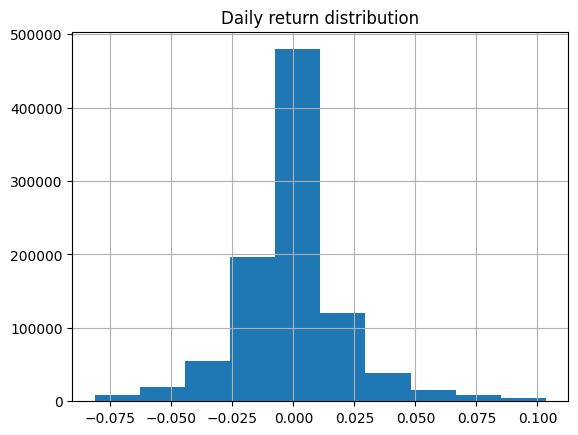

In [24]:
_ = price_df["r_01"].hist(bins=10)
_ = plt.title("Daily return distribution")

## Return & Risk of stocks

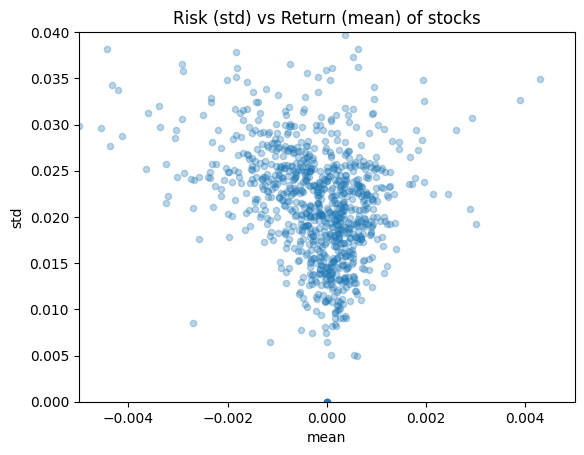

In [25]:
_ = price_df.groupby("symbol")["r_01"].agg(["mean", "std"]).plot(kind="scatter", x="mean", y="std", alpha=0.3)

_ = plt.xlim([-.005, .005])
_ = plt.ylim([0, .04])

_ = plt.title("Risk (std) vs Return (mean) of stocks")

# Company information
Since the company information only contains corresponding industry and sector of each symbol, we will quickly look at
1. Top 10 industries with most symbols
2. Top 10 secotors with most symbols

In [26]:
company_info_df = pd.read_csv(DATA_DIR / "data/set_company_info.csv")

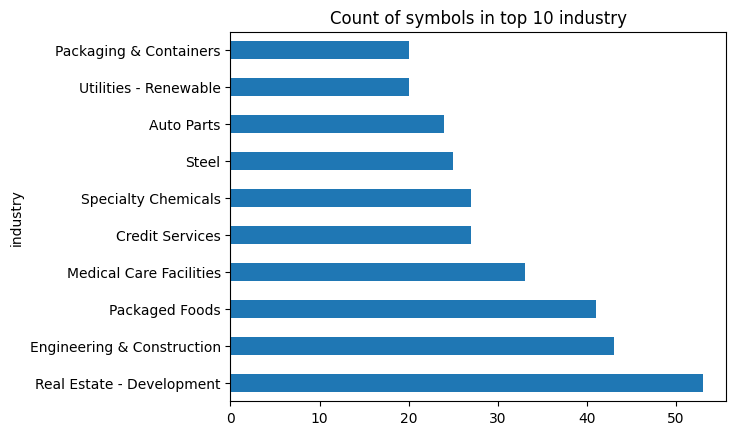

In [27]:
_ = company_info_df["industry"].value_counts().head(10).plot(kind="barh")
_ = plt.title("Count of symbols in top 10 industry")

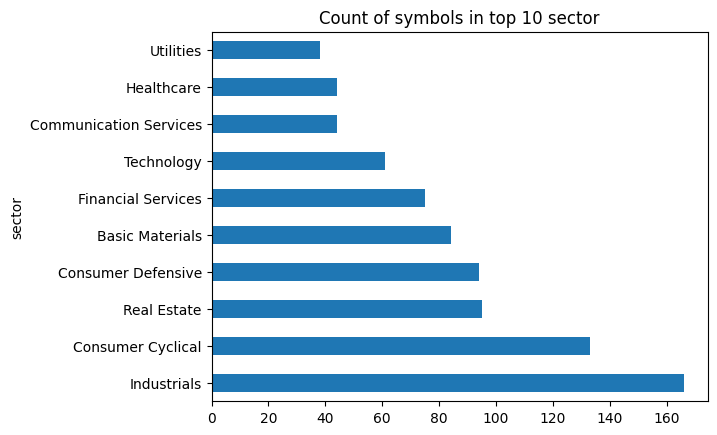

In [28]:
_ = company_info_df["sector"].value_counts().head(10).plot(kind="barh")
_ = plt.title("Count of symbols in top 10 sector")

# Income statement

1. %missing of data -> if some columns contain only a small portion of data, they might not be so useful
2. data availability -> how many years back is the data available?

In [29]:
incm_stmt_df = pd.read_csv(DATA_DIR / "data/set_incm_stmt.csv")

In [30]:
incm_stmt_df.head()

,date,symbol,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,Interest Income,Normalized Income,Net Income From Continuing And Discontinued Operation,Total Expenses,Diluted Average Shares,Basic Average Shares,Diluted EPS,Basic EPS,Diluted NI Availto Com Stockholders,Net Income Common Stockholders,Net Income,Net Income Including Noncontrolling Interests,Net Income Continuous Operations,Tax Provision,Pretax Income,Other Income Expense,Other Non Operating Income Expenses,Special Income Charges,Gain On Sale Of Ppe,Other Special Charges,Gain On Sale Of Security,Net Non Operating Interest Income Expense,Interest Expense Non Operating,Interest Income Non Operating,Operating Income,Operating Expense,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Salaries And Wages,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue,Minority Interests,Impairment Of Capital Assets,Total Operating Income As Reported,Otherunder Preferred Stock Dividend,Total Other Finance Cost,Other Operating Expenses,Other Taxes,Depreciation Amortization Depletion Income Statement,Depreciation And Amortization In Income Statement,Earnings From Equity Interest,Provision For Doubtful Accounts,Rent Expense Supplemental,Write Off,Rent And Landing Fees,Net Income Discontinuous Operations,Gain On Sale Of Business,Restructuring And Mergern Acquisition,Other Non Interest Expense,Average Dilution Earnings,Amortization,Amortization Of Intangibles Income Statement,Depreciation Income Statement,Insurance And Claims,Loss Adjustment Expense,Net Policyholder Benefits And Claims,Policyholder Benefits Gross,Policyholder Benefits Ceded,Occupancy And Equipment,Preferred Stock Dividends,Net Income From Tax Loss Carryforward,Research And Development,Professional Expense And Contract Services Expense,Earnings From Equity Interest Net Of Tax,Net Income Extraordinary,Excise Taxes
0,2023-12-31,24CS,2.478119e+05,0.195597,-44136736.0,1266954.0,1266954.0,-45071044.0,9617938.0,6.714324e+08,-42869782.0,-52487720.0,-2439536.0,3542679.0,1103143.0,-4.609019e+07,-45071044.0,7.427603e+08,430000000.0,430000000.0,-0.100000,-0.100000,-45071044.0,-45071044.0,-45071044.0,-45071044.0,-45071044.0,-10959355.0,-56030399.0,7674673.0,6407719.0,1266954.0,1214952.0,-52002.0,NaN,-2439536.0,3542679.0,1103143.0,-61265536.0,71327944.0,71327944.0,9318398.0,62009546.0,62009546.0,NaN,10062408.0,6.714324e+08,6.814948e+08,6.814948e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-31,24CS,5.479578e+05,0.223307,41876591.0,2453829.0,2453829.0,24494231.0,7726356.0,8.700639e+08,44330420.0,36604064.0,-4082461.0,5067487.0,985026.0,2.258836e+07,24494231.0,9.456595e+08,325513699.0,325513699.0,0.080000,0.080000,24494231.0,24494231.0,24494231.0,24494231.0,24494231.0,7042346.0,31536577.0,2710901.0,257072.0,1295046.0,1295046.0,NaN,1158783.0,-4082461.0,5067487.0,985026.0,32908137.0,75595530.0,75595530.0,NaN,NaN,NaN,NaN,108503667.0,8.700639e+08,9.785676e+08,9.785676e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-12-31,24CS,0.000000e+00,0.241495,35101165.0,0.0,0.0,19455578.0,6959244.0,5.637045e+08,35101165.0,28141921.0,-2013217.0,2492033.0,478816.0,1.945558e+07,19455578.0,6.139717e+08,430000000.0,430000000.0,0.045246,0.045246,19455578.0,19455578.0,19455578.0,19455578.0,19455578.0,6194310.0,25649888.0,161675.0,161675.0,0.0,0.0,NaN,NaN,-2013217.0,2492033.0,478816.0,27501430.0,50267186.0,50267186.0,19250000.0,31020000.0,2560000.0,28460000.0,77768616.0,5.637045e+08,6.414731e+08,6.414731e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## %Missing of data

In [31]:
incm_stmt_df.isna().mean().sort_values().head(10)

,0
date,0.000000
symbol,0.000000
Normalized Income,0.008564
Net Income Common Stockholders,0.008564
Net Income,0.008564
Net Income Including Noncontrolling Interests,0.008564
Net Income From Continuing And Discontinued Operation,0.008564
Net Income Continuous Operations,0.008564
Total Revenue,0.008564
Operating Revenue,0.008564


In [32]:
incm_stmt_df.isna().mean().sort_values(ascending=False).head(10)

,0
Excise Taxes,0.999715
Net Income Extraordinary,0.999144
Earnings From Equity Interest Net Of Tax,0.998287
Preferred Stock Dividends,0.998287
Average Dilution Earnings,0.998002
Professional Expense And Contract Services Expense,0.997716
Research And Development,0.996574
Net Income From Tax Loss Carryforward,0.992292
Amortization Of Intangibles Income Statement,0.991436
Amortization,0.991436


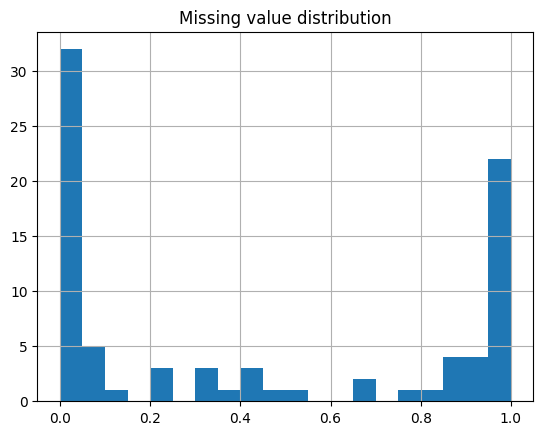

In [33]:
_ = incm_stmt_df.isna().mean().hist(bins=20)
_ = plt.title("Missing value distribution")

In [34]:
incm_stmt_df.columns[incm_stmt_df.isna().mean() > .95]

Index(['Otherunder Preferred Stock Dividend', 'Other Taxes',
       'Rent And Landing Fees', 'Restructuring And Mergern Acquisition',
       'Other Non Interest Expense', 'Average Dilution Earnings',
       'Amortization', 'Amortization Of Intangibles Income Statement',
       'Depreciation Income Statement', 'Insurance And Claims',
       'Loss Adjustment Expense', 'Net Policyholder Benefits And Claims',
       'Policyholder Benefits Gross', 'Policyholder Benefits Ceded',
       'Occupancy And Equipment', 'Preferred Stock Dividends',
       'Net Income From Tax Loss Carryforward', 'Research And Development',
       'Professional Expense And Contract Services Expense',
       'Earnings From Equity Interest Net Of Tax', 'Net Income Extraordinary',
       'Excise Taxes'],
      dtype='object')

## Data availability

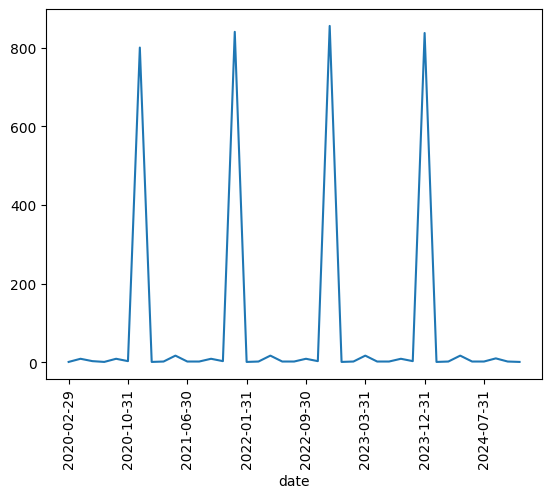

In [35]:
_ = incm_stmt_df["date"].value_counts().sort_index().plot()
_ = plt.xticks(rotation=90)